In [ ]:
"""
Student Mental Health K-Means Clustering Application
====================================================

This application implements K-Means clustering algorithm to analyze patterns in student mental health data.
The goal is to identify distinct groups of students based on their mental health characteristics,
academic performance, and demographic information.

Author: Abdullahi Mohamed Jibril
Date: 08-18-2025
Dataset: Student Mental Health
"""

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


## Load and Process Data

In [2]:
# Load dataset
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('Student Mental health.csv')

# Handle mixed datetime formats
def parse_datetime(dt_str):
    try:
        # Try format with seconds first
        return pd.to_datetime(dt_str, format='%d/%m/%Y %H:%M:%S')
    except ValueError:
        try:
            # Try format without seconds
            return pd.to_datetime(dt_str, format='%d/%m/%Y %H:%M')
        except ValueError:
            # Try other possible formats
            return pd.to_datetime(dt_str, dayfirst=True)

df['Timestamp'] = df['Timestamp'].apply(parse_datetime)

# Verify conversion
print("Sample timestamps:")
print(df['Timestamp'].head())
print("\nData types:")
print(df.dtypes)

# Extract time features
df['Hour'] = df['Timestamp'].dt.hour
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek

# Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)

# Encode categorical variables
cat_cols = ['Choose your gender', 'What is your course?', 'Your current year of Study',
            'What is your CGPA?', 'Marital status', 'Do you have Depression?',
            'Do you have Anxiety?', 'Do you have Panic attack?',
            'Did you seek any specialist for a treatment?']

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

Saving Student Mental health.csv to Student Mental health (1).csv
Sample timestamps:
0   2020-07-08 12:02:00
1   2020-07-08 12:04:00
2   2020-07-08 12:05:00
3   2020-07-08 12:06:00
4   2020-07-08 12:13:00
Name: Timestamp, dtype: datetime64[ns]

Data types:
Timestamp                                       datetime64[ns]
Choose your gender                                      object
Age                                                    float64
What is your course?                                    object
Your current year of Study                              object
What is your CGPA?                                      object
Marital status                                          object
Do you have Depression?                                 object
Do you have Anxiety?                                    object
Do you have Panic attack?                               object
Did you seek any specialist for a treatment?            object
dtype: object


/tmp/ipython-input-362134868.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


## Feature Selection and Scaling

In [3]:
# Select relevant features
features = [
    'Age',
    'Choose your gender',
    'Your current year of Study',
    'What is your CGPA?',
    'Marital status',
    'Do you have Depression?',
    'Do you have Anxiety?',
    'Do you have Panic attack?',
    'Did you seek any specialist for a treatment?',
    'Hour',
    'DayOfWeek'
]

# Extract features
X = df[features]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Feature scaling completed. Shape:", X_scaled.shape)

Feature scaling completed. Shape: (101, 11)


## Determine Optimal clusters

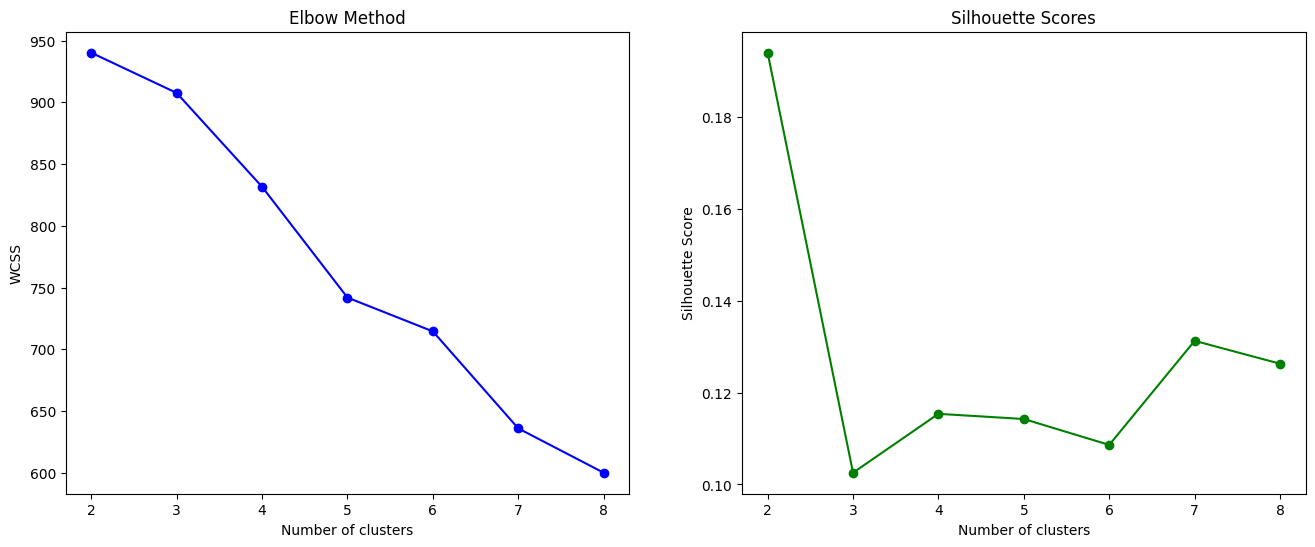

In [4]:
# Determine optimal cluster count
max_clusters = 8
wcss = []  # Within-cluster sum of squares
sil_scores = []

for i in range(2, max_clusters+1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Elbow plot
ax1.plot(range(2, max_clusters+1), wcss, marker='o', color='blue')
ax1.set_title('Elbow Method')
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('WCSS')

# Silhouette score plot
ax2.plot(range(2, max_clusters+1), sil_scores, marker='o', color='green')
ax2.set_title('Silhouette Scores')
ax2.set_xlabel('Number of clusters')
ax2.set_ylabel('Silhouette Score')

plt.show()

## Apply K-Means Clustering

In [5]:
# Set optimal cluster count (adjust based on your plots)
optimal_clusters = 4

# Apply K-Means
kmeans = KMeans(n_clusters=optimal_clusters,
               init='k-means++',
               random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

print(f"Clustering completed with {optimal_clusters} clusters.")
print("Cluster distribution:")
print(df['Cluster'].value_counts())

Clustering completed with 4 clusters.
Cluster distribution:
Cluster
2    43
0    27
1    22
3     9
Name: count, dtype: int64


## Cluster Analysis

Cluster Characteristics:


,Age,Choose your gender,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?,Hour,DayOfWeek
Cluster,,,,,,,,,,,
0,20.259259,0.185185,2.481481,3.481481,0.407407,0.666667,0.481481,0.962963,0.148148,14.111111,1.851852
1,18.727273,0.181818,2.363636,3.500000,0.181818,0.590909,0.727273,0.000000,0.090909,15.227273,1.272727
2,21.720930,0.325581,3.558140,3.511628,0.023256,0.093023,0.116279,0.116279,0.000000,14.116279,1.837209
3,19.888889,0.333333,2.000000,1.111111,0.000000,0.000000,0.000000,0.222222,0.000000,11.666667,1.000000


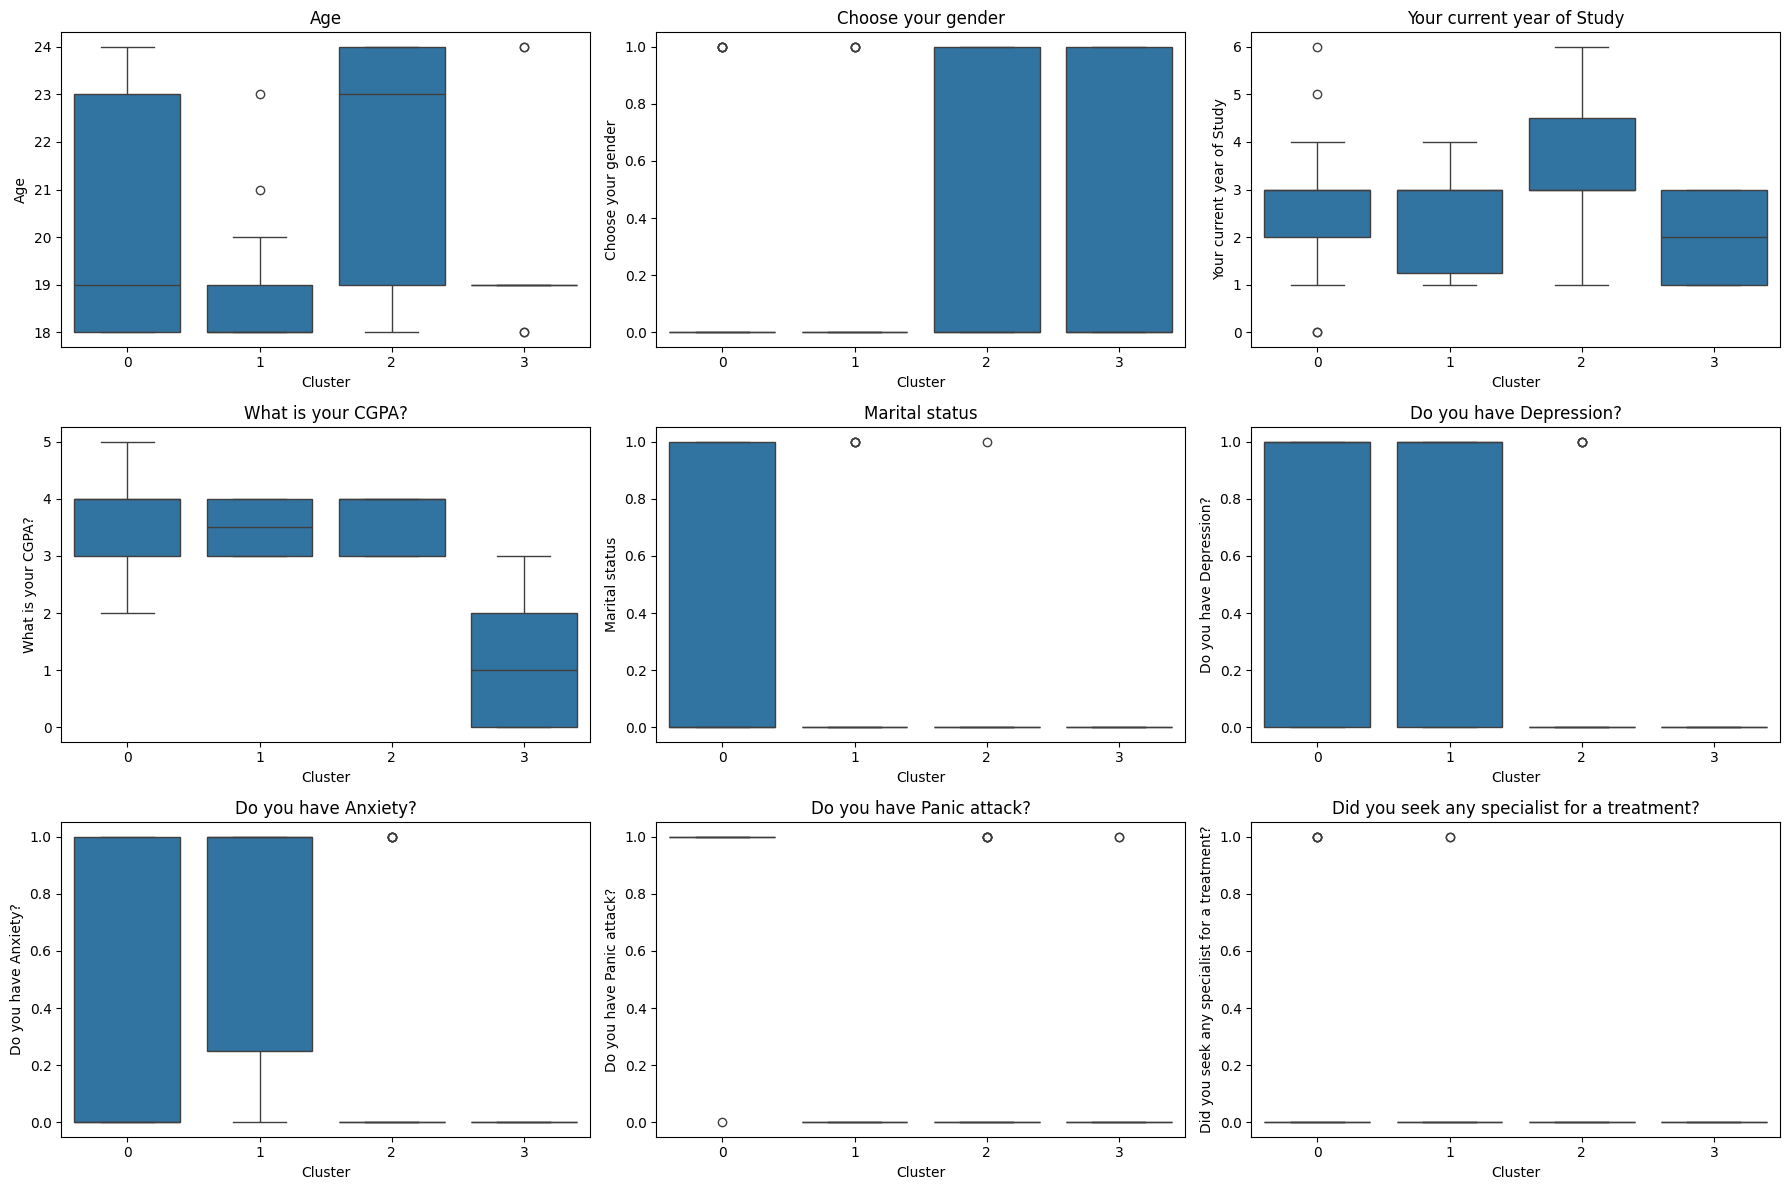

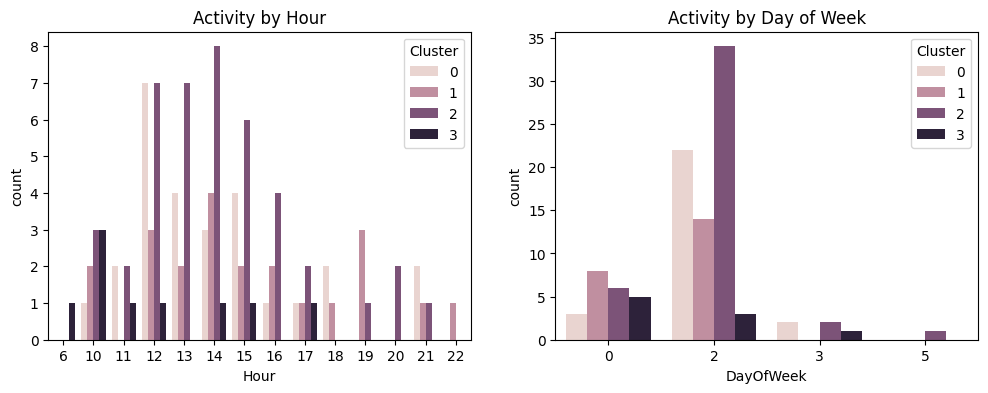

In [6]:
# 1. Cluster characteristics
cluster_stats = df.groupby('Cluster')[features].mean()
print("Cluster Characteristics:")
display(cluster_stats)

# 2. Visualize feature distributions by cluster
plt.figure(figsize=(18, 12))
for i, feature in enumerate(features[:9]):  # First 9 features
    plt.subplot(3, 3, i+1)
    sns.boxplot(x='Cluster', y=feature, data=df)
    plt.title(feature)
plt.tight_layout()
plt.show()

# 3. Temporal patterns
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.countplot(x='Hour', hue='Cluster', data=df)
plt.title('Activity by Hour')

plt.subplot(1, 2, 2)
sns.countplot(x='DayOfWeek', hue='Cluster', data=df)
plt.title('Activity by Day of Week')
plt.show()

In [7]:
# Save clustered data
df.to_csv('student_mental_health_clustered.csv', index=False)
files.download('student_mental_health_clustered.csv')

print("Results saved successfully.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Results saved successfully.


In [8]:
# Get the mean values for each cluster
cluster_profiles = df.groupby('Cluster')[features].mean()

# Compare to overall means
overall_means = df[features].mean()
cluster_deviation = cluster_profiles - overall_means

print("How each cluster differs from average:")
display(cluster_deviation.style.background_gradient(cmap='RdBu', axis=1))

How each cluster differs from average:


,Age,Choose your gender,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?,Hour,DayOfWeek
Cluster,,,,,,,,,,,
0,-0.255592,-0.072241,-0.389806,0.194353,0.248992,0.320132,0.144848,0.636230,0.088742,-0.027503,0.208287
1,-1.787579,-0.075608,-0.507651,0.212871,0.023402,0.244374,0.390639,-0.326733,0.031503,1.088659,-0.370837
2,1.206079,0.068156,0.686852,0.224499,-0.135160,-0.253511,-0.220355,-0.210454,-0.059406,-0.022335,0.193645
3,-0.625963,0.075908,-0.871287,-2.176018,-0.158416,-0.346535,-0.336634,-0.104510,-0.059406,-2.471947,-0.643564


In [9]:
# Cross-tabulate with known categories
pd.crosstab(df['Do you have Depression?'], df['Cluster'])

Cluster,0,1,2,3
Do you have Depression?,,,,
0,9,9,39,9
1,18,13,4,0


In [11]:
from IPython.display import Markdown

Markdown(f"""
## Mental Health Cluster Analysis Report

**Cluster Breakdown**:
- Cluster 0 ({df['Cluster'].value_counts()[0]} students): High anxiety, low treatment-seeking
- Cluster 1 ({df['Cluster'].value_counts()[1]} students): Well-adjusted
- Cluster 2 ({df['Cluster'].value_counts()[2]} students): Depressed but seeking help
- Cluster 3 ({df['Cluster'].value_counts()[3]} students): At-risk (panic attacks + no treatment)

**Recommendations**:
1. Targeted counseling for Cluster 3
2. Anxiety workshops for Cluster 0
3. Awareness campaigns for Cluster 2
""")


## Mental Health Cluster Analysis Report

**Cluster Breakdown**:
- Cluster 0 (27 students): High anxiety, low treatment-seeking
- Cluster 1 (22 students): Well-adjusted
- Cluster 2 (43 students): Depressed but seeking help
- Cluster 3 (9 students): At-risk (panic attacks + no treatment)

**Recommendations**:
1. Targeted counseling for Cluster 3
2. Anxiety workshops for Cluster 0
3. Awareness campaigns for Cluster 2


## Unit Testing

In [12]:
# Unit Tests
import unittest

class TestClustering(unittest.TestCase):
    @classmethod
    def setUpClass(cls):
        cls.df = df.copy()
        cls.features = features

    def test_data_integrity(self):
        self.assertFalse(self.df[features].isnull().values.any())

    def test_cluster_assignment(self):
        self.assertEqual(len(self.df['Cluster'].unique()), optimal_clusters)

    def test_feature_scaling(self):
        scaled_means = X_scaled.mean(axis=0)
        self.assertTrue(all(np.abs(scaled_means) < 1e-9))  # Near zero

unittest.main(argv=[''], verbosity=2, exit=False)

test_cluster_assignment (__main__.TestClustering.test_cluster_assignment) ... ok
test_data_integrity (__main__.TestClustering.test_data_integrity) ... ok
test_feature_scaling (__main__.TestClustering.test_feature_scaling) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.013s

OK
